## MSTICPy and Notebooks in InfoSec

---

# <a style="border: solid; padding:5pt; color:black; background-color:#909090">Session 1 - Introduction to Notebooks & MSTICPy</a>

---

## What this session covers:
 - Basics of Jupyter Notebooks
 - MSTICPy Installation
 - MSTICPy Basics
 - Some MSTICPy features

## Prerequisites
- Python >= 3.8 Environment
- Jupyter installed
- MSTICPy
- The msticpyconfig.yaml file from the training repo    


---

# <a style="border: solid; padding:5pt; color:black; background-color:#909090">What are Jupyter Notebooks</a>

---

A Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. 

A Jupyter notebook combines two components:

 - **A web application:** a browser-based tool for interactive authoring of documents which combine explanatory text, code, and their rich media output.
 - **Notebook documents:** a representation of all content visible in the web application, including inputs and outputs of the code, explanatory text, images, and rich media representations of objects.

Uses include:
 - Data cleaning and transformation
 - Statistical modeling
 - Data visualization
 - Machine learning
 - Security investigations!

Reference: https://jupyter.org/

In [ ]:
our_variable = "Hello World"
print("Welcome to our MSTICPy training")

Code executed in a cell will display its output below, and any variables or objects created in one cell are accessible to other cells.<br>
These persist until the kernel is restarted.

In [ ]:
our_variable

There are ways to display a wide range of content types via the IPython.display package. <br>
These include multimedia features such as the ability to display YouTube videos.

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('m3YElHwZX1U', width=1000, height=800)

By default the last item returned in the cell is displayed. <br>
However, if we explicitly request it we can display multiple items from a cell.

In [ ]:
from IPython.display import Code
display(Code("print('Hello World'"))
print("This is our second output")

## <a style="border: solid; padding:5pt; color:black; background-color:#309030">1st Exercise - Displaying Output</a>

We are going to output some code and a video so far but now we are going to include a few other output types:
 - HMTL code
 - An image

Write code in the cell below that output some HTML of your choosing (if you need a suggestion try `<font size=48, color=blue>Hello World!</font>`)<br>
Display the image at https://www.microsoft.com/security/blog/wp-content/uploads/2020/07/STRONTIUM-Win17_CDOC_N15-BANNER.png

Don't worry if you get stuck we will go through the answers together in a couple of minutes.

<details>
<summary>Hints...</summary>
<ul>
<li>You are going to need to need to use IPython.display features - <a href="https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html">https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html</a></li>
<li> Make sure you import <b>HTML</b> and <b>Image</b> from IPython.display</li>
<li>By default the last output in a cell is displayed - if you need to display other items you need to explicitly display them.</li>
</ul>
</details>

### How does it work?

![Architecural diagram showing the relationship between users, Jupyter servers and the kernel](https://raw.githubusercontent.com/OTRF/infosec-jupyterthon/5c2dd571553ad2ae9422ff7941732ae33399b70c/workshops/2021/media/day1/jupyter-notebooks-architecture.png "Jupyter Architecture")


The Jupyter server is traditionally a single user service, however services like Jupyter Hub are single services that provide servers to multiple users within a group at once.

Reference: [https://jupyterhub.readthedocs.io/en/latest/reference/technical-overview.html]("https://jupyterhub.readthedocs.io/en/latest/reference/technical-overview.html")

Notebooks are supported by a range of clients including:
 - VSCode (we are here!)
 - Jupyter classic
 - Jupyter Lab

There are also multiple cloud hosted version of Notebooks where the client, server and kernels are provided to users as a service.
Within Azure the primary services are:
 - [Azure Machine Learning](https://learn.microsoft.com/en-us/azure/machine-learning/overview-what-is-azure-machine-learning)
 - [Azure Synapse](https://learn.microsoft.com/en-us/azure/synapse-analytics/overview-what-is)

Other cloud providers have similar services:
 - [AWS Sagemaker](https://docs.aws.amazon.com/sagemaker/latest/dg/whatis.html)
 - [Google Collab](https://colab.research.google.com/)

### Environment Hints
The best environment is the one that works for you but which should you pick?
This flow diagram can help you decide:

![Flow diagram to help select the right environment for your use case](media/env_flow_diagram.png "Environment selection flow diagram")

---

# <a style="border: solid; padding:5pt; color:black; background-color:#909090">MSTICPy</a>

---

MSTICPy is a library for InfoSec investigation and hunting in Jupyter Notebooks. It includes functionality to:

 - query log data from multiple sources
 - enrich the data with Threat Intelligence, geo-locations and Azure resource data
 - extract Indicators of Activity (IoA) from logs and unpack encoded data
 - perform sophisticated analysis such as anomalous session detection and time series decomposition
 - visualize data using interactive timelines, process trees and multi-dimensional Morph Charts

It also includes some time-saving notebook tools such as widgets to set query time boundaries, select and display items from lists, and configure the notebook environment.

Source Code: https://github.com/microsoft/msticpy <br>
Python Package: https://pypi.org/project/msticpy/ <br>
Docs: https://msticpy.readthedocs.io/en/latest/

### Installing MSTICPy

MSTICPy is a library with a broad range of functionality. As such installing the whole library can be more than required for a lot of uses. As such MSTICPy has implemented a series of  Extras that allow for the installation of certain part of the library. These Extras are grouped around core technologies that you might want to use with MSTICPy.

| Extra      | Functionality 
|------------|-------------------------------------------------------------|
| --none--   | Most functionality (approx 75%) Kqlmagic Jupyter basic
| keyvault   | Key Vault and keyring storage of settings secrets
| azure      | Azure API data retrieval, Azure storage APIs, Sentinel APIs 
| kql        | Kqlmagic Jupyter extended functionality
| azsentinel | Combination of core install + "azure", "keyvault", "kql"
| ml         | Timeseries analysis, Event clustering, Outlier analysis
| splunk     | Splunk data queries
| vt3        | VirusTotal V3 graph API
| riskiq     | RiskIQ Illuminate threat intel provider & pivot functions
| all        | Includes all of above packages
| dev        | Development tools plus "base"
| test       | "dev" plus "all"

To install a specific Extra, use the following syntax:
`%pip install msticpy[extra]`

You can also install multiple extras at once:
`%pip install msticpy[extra1,extra2,...]`

Ref: https://msticpy.readthedocs.io/en/latest/getting_started/Installing.html

In [ ]:
%pip install msticpy[all]

Setting up MSTICPy for use is easy - the preferred method to import the package is with the `mp` alias. <br>
Once imported you can then call the `init_notebook` feature that will perform the required imports and other set up to get you up and running.<br>
`init_notebook` does a number of things:
 - Import key features in the package for easy access
 - Perform set up steps specific to certain environments (such as AML or Synapse) if running notebooks there
 - Sets up Pivots (more on these later)
 - Can load a set of default providers (if set)

In [ ]:
# Set up MSTICPy
import msticpy as mp
mp.init_notebook()

env: MSTICPYCONFIG=./msticpyconfig.yaml


## Finding features in MSTICPy
MSTICPy has a wide range of features, knowing where these are and how to use them is key.

You can search for features using the `search` feature. This allows you to search the MSTICPy package for anything matching you search term.

Ref: https://msticpy.readthedocs.io/en/latest/getting_started/QuickStart.html#searching-for-a-msticpy-module

In [3]:
mp.search("graph")

Module,Help
msticpy.nbtools.security_alert_graph,msticpy.nbtools.security_alert_graph
msticpy.datamodel.entities.entity_graph,msticpy.datamodel.entities.entity_graph
msticpy.vis.entity_graph_tools,msticpy.vis.entity_graph_tools
msticpy.data.drivers.resource_graph_driver,msticpy.data.drivers.resource_graph_driver
msticpy.datamodel.entities.graph_property,msticpy.datamodel.entities.graph_property
msticpy.data.drivers.security_graph_driver,msticpy.data.drivers.security_graph_driver


## Getting Help

### 1. ReadtheDocs - https://msticpy.readthedocs.io/

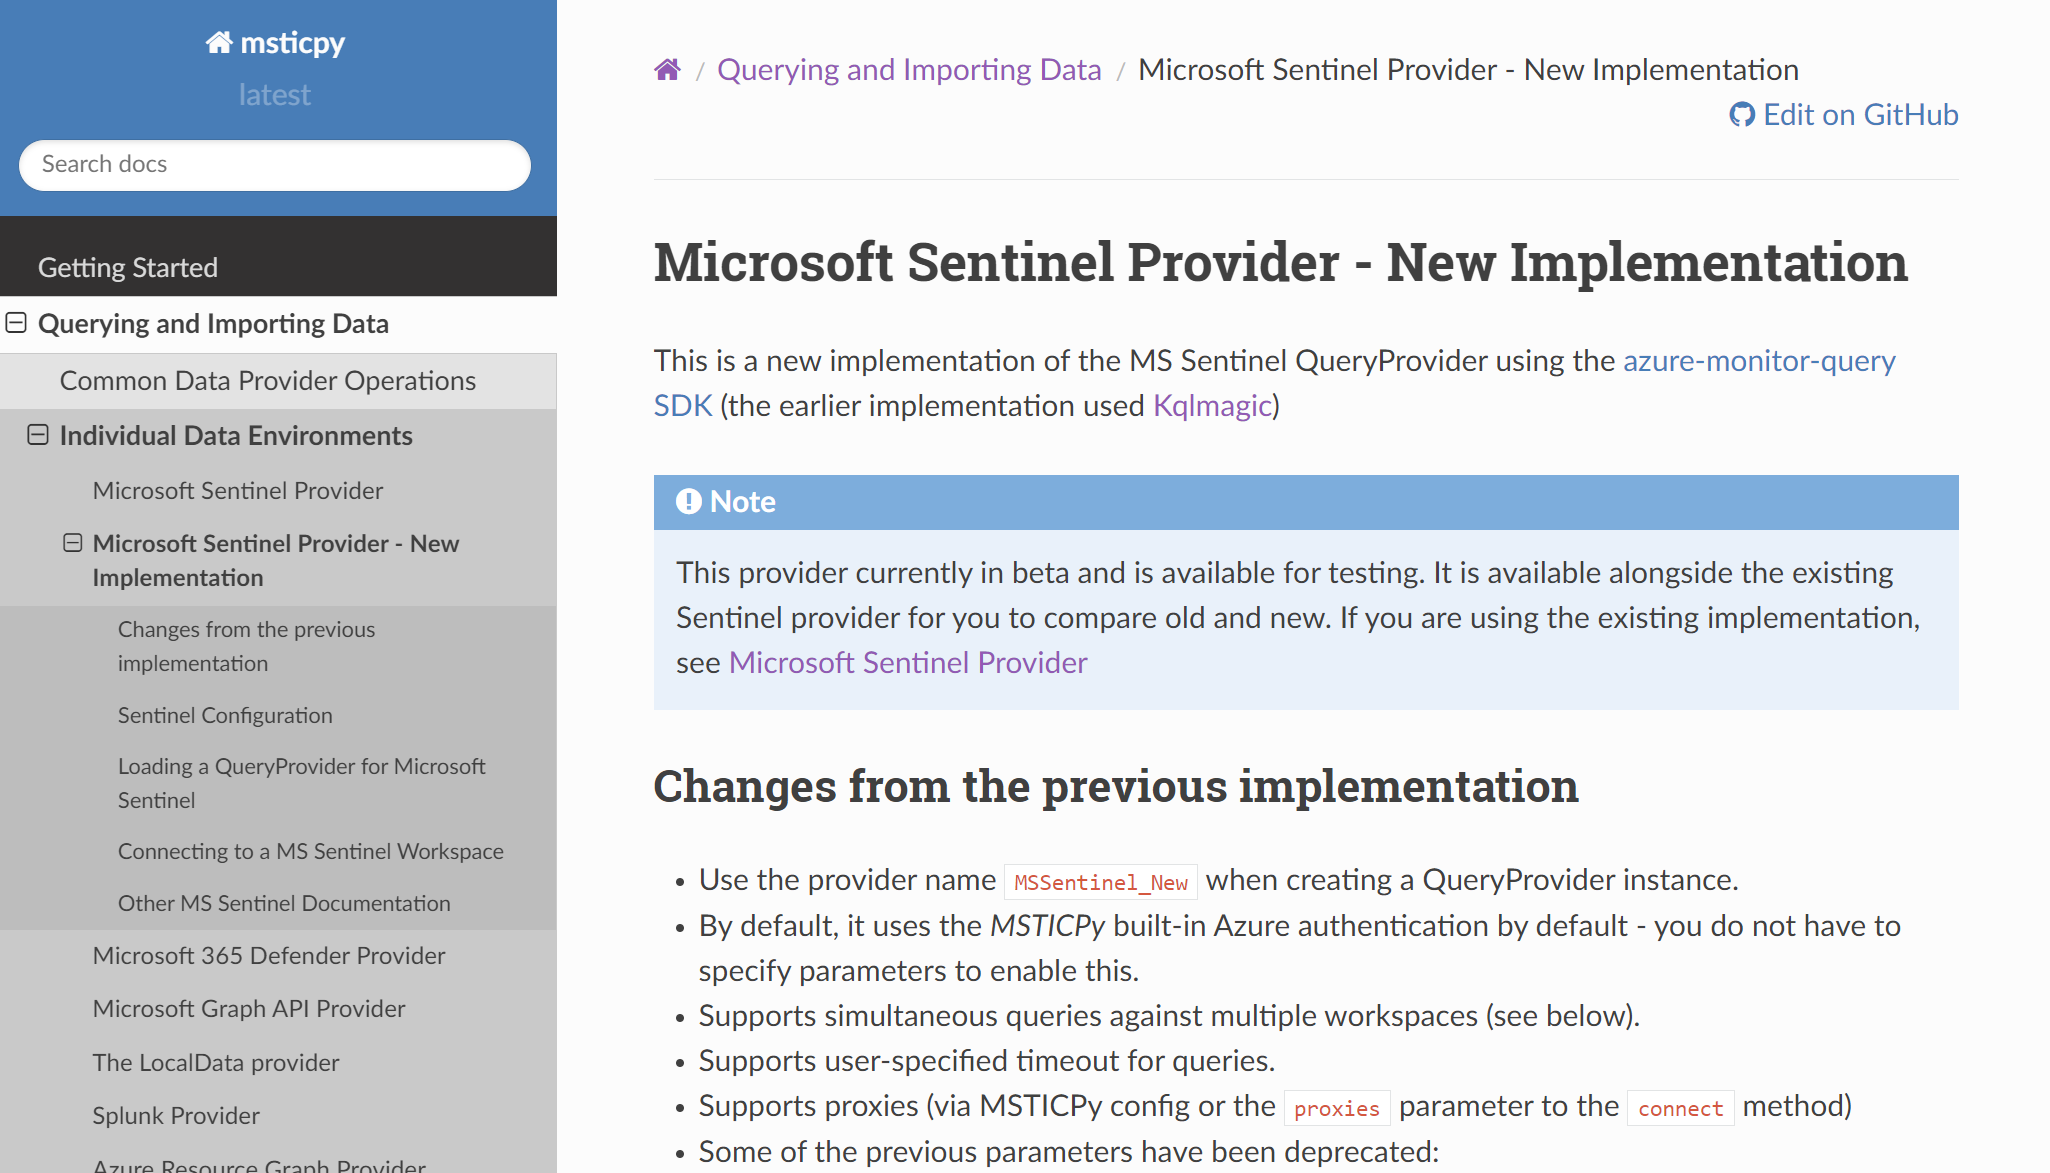

### 2 Python help

Make use of Python builtin help.

```python3
>>> help(mp)
```
```text
Help on package msticpy:

NAME
    msticpy - Jupyter and Python Tools for InfoSec.

DESCRIPTION
    -----------------------------------------------
    
    Requires Python 3.8 or later.
    
    Getting Started
    ---------------
    
    To quickly import common modules into a notebook run:
    
    >>> import msticpy as mp
    >>> mp.init_notebook()
    
    If not running in a notebook/IPython use
    >>> mp.init_notebook(globals())
    
    To see help on `init_notebook`:
    >>> help(mp.init_notebook)
    
    Search msticpy modules for a keyword:
    >>> mp.search(keyword)
    
    -----------------------------------------------
    
    Full documentation is available at:
    https://msticpy.readthedocs.io
```

In [9]:
help(mp.QueryProvider.list_queries)

Help on function list_queries in module msticpy.data.core.query_provider_utils_mixin:

list_queries(self, substring: Optional[str] = None) -> List[str]
    Return list of family.query in the store.
    
    Parameters
    ----------
    substring : Optional[str]
        Optional pattern - will return only queries matching the pattern,
        default None.
    
    Returns
    -------
    List[str]
        List of queries



## MSTICPy's config file

MSTICPy can handle connections to a variety of data sources and services, including Microsoft Sentinel, Defender, and Kusto.

To make it easier to manage and re-use the configuration and credentials fo these things MSTICPy has its own config file that holds these items - `msticpyconfig.yaml`

We will have a session later covering the configuration file in depth where you will populate your own file with key details.<br>
For now we have a skeleton config file for you with a few items populated that we are going to use here.

You can populate msticpyconfig manually or you can used MSTICPy's settings editor to view and edit the settings stored there.<br>
Here we use settings editor to look at what we currently have populated.

Ref: https://msticpy.readthedocs.io/en/latest/getting_started/msticpyconfig.html

In [ ]:
msticpy.MpConfigEdit()

### Lets get some data from Sentinel

To show you some of things MSTICPy can do we have a short example of getting some data from Sentinel, enriching it, and visualizing it. We will be deep diving into each of these elements in much more detail during the training.

Ref: https://msticpy.readthedocs.io/en/latest/DataAcquisition.html

The first step is to load a QueryProvider for Sentinel:

In [ ]:
qry_prov = mp.QueryProvider("MSSentinel")
qry_prov.connect(mp.WorkspaceConfig())

Now we can run some queries using MSTICPy's built in queries:

In [ ]:
signin_df = qry_prov.Azure.list_all_signins_geo()
signin_df.head()

Next we will user MSTICPy's threat intelligence features to see if any of the logon IPs in our dataset appear in our Threat Intelligence feeds.

Ref: https://msticpy.readthedocs.io/en/latest/data_acquisition/TIProviders.html

In [ ]:
ti_lookup = mp.TILookup()
results_df = ti_lookup.lookup_iocs(signin_df[signin_df["ResultType"] != 0].head(100), "IPAddress")
results_df.head()

In [ ]:
ti_lookup.browse_results(results_df)

We can also use MSTICPy's visualization features to look at the data in a different way:

Ref: https://msticpy.readthedocs.io/en/latest/visualization/EventTimeline.html

In [ ]:
signin_df.mp_plot.timeline(group_by="ResultType")

In [ ]:
signin_df = signin_df.replace(r'', 0, regex=True)
signin_df["Latitude"] = signin_df["Latitude"].astype(float)
signin_df["Longitude"] = signin_df["Longitude"].astype(float)
signin_df.head(100).mp_plot.folium_map(lat_column="Latitude", long_column="Longitude", layer_column="ResultType")

We can also access features through something called Pivots - which allow you to take a common entity (such as an IP address) and performs some common actions on it.

Ref: https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html

In [ ]:
Url.MSSentinel.DeviceNetworkEvents_url_connections(url="www.microsoft.com").head()

Since both the **input** and the **output** of most pivot functions
is a *pandas* DataFrame, we can chain them into pipelines.

- The first line in the pipeline uses a *Pivot function* that runs a query.
- Each subsequent step in the pipeline uses a MSTICPy pandas accessor to invoke another pivot function
  or visualization function.

In [ ]:
(
    Url.MSSentinel.DeviceNetworkEvents_url_connections(url="www.microsoft.com")
    # Lookup IPs
    .mp_pivot.run(IpAddress.ti.lookup_ip, column="RemoteIP", join="left")
    # lookup whois info for IPs
    .mp_pivot.run(IpAddress.util.whois, column="Ioc", join="left").head(50)
    # display sample of intermediate results
    # Send the output of this to a plot
    .mp_plot.timeline(
        title="Connections to microsoft.com by device",
        time_column="TimeGenerated_src",
        source_columns=["RemoteIP_src", "DeviceName_src", "asn_description"],
        group_by="DeviceName_src"
    )
)